# Stroke Dectection - K-Nearest Neighbors & Logistic Regression


### Data Description

    * id: unique identifier
    * gender: "Male", "Female" or "Other"
    * age: age of the patient
    * hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    * heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
    * ever_married: "No" or "Yes"
    * work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
    * Residence_type: "Rural" or "Urban"
    * avg_glucose_level: average glucose level in blood
    * bmi: body mass index
    * smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
    * stroke: 1 if the patient had a stroke or 0 if not

### Data Source:
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

### Context

According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## 1. Understand the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('/Users/louietran/Downloads/healthcare-dataset-stroke-data.csv')
data_og = data.copy()

### a. Univariate Analysis

Univariate Selction — Statistical tests may be used to pick certain features that have the best relationship to the performance variable.
The scikit-learn library provides the SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests.
The following example uses the chi-squared (chi2) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

#### Target Variable

<AxesSubplot:>

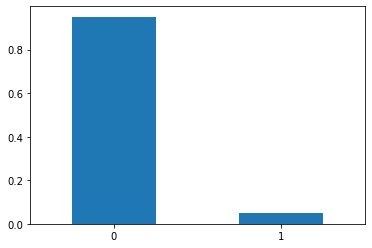

In [2]:
data.stroke.value_counts(normalize=True).plot.bar(rot=0)

From the chart above, the amount of people who experienced a stroke is significantly greater than who have never experienced it, indicating that this dataset is imbalanced.

**Categorical Variables**

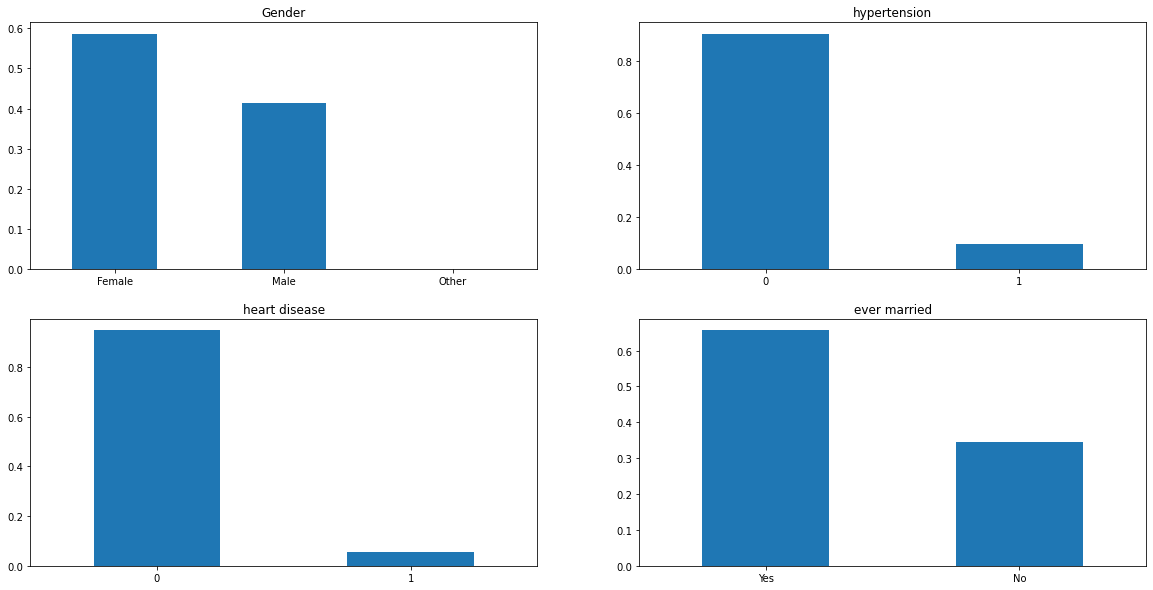

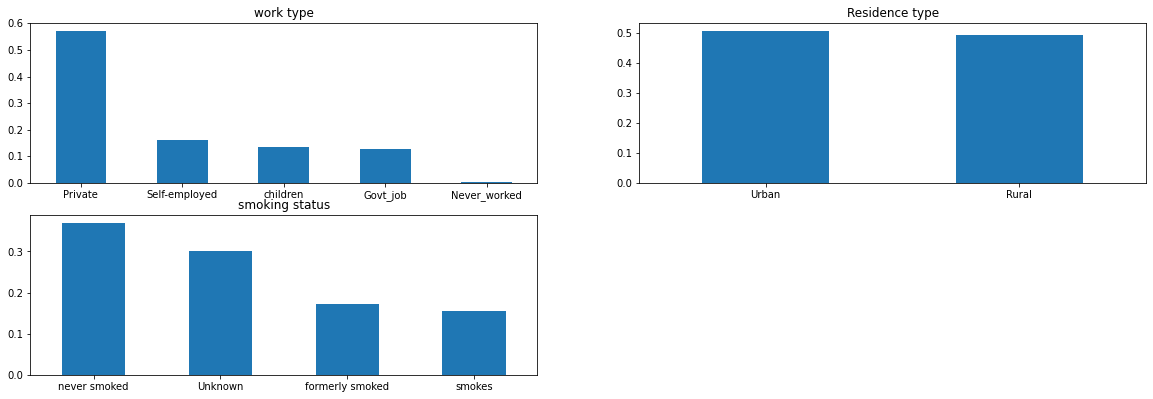

In [3]:
plt.figure(1)
plt.subplot(221)
data['gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender',rot=0)
plt.subplot(222)
data['hypertension'].value_counts(normalize=True).plot.bar(title='hypertension',rot=0)
plt.subplot(223)
data['heart_disease'].value_counts(normalize=True).plot.bar(title='heart disease',rot=0)
plt.subplot(224)
data['ever_married'].value_counts(normalize=True).plot.bar(title='ever married',rot=0)
plt.show()
plt.subplot(321)
data['work_type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='work type',rot=0)
plt.subplot(322)
data['Residence_type'].value_counts(normalize=True).plot.bar(title='Residence type',rot=0)
plt.subplot(323)
data['smoking_status'].value_counts(normalize=True).plot.bar(title='smoking status',rot=0)
plt.show()

**Numerical Variables**

/Users/louietran/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


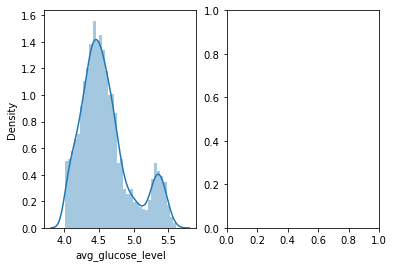

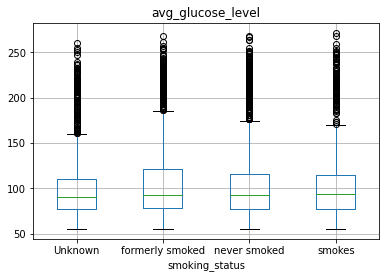

In [4]:
import seaborn as sns
plt.figure(1) 
plt.subplot(121)
sns.distplot(np.log(data['avg_glucose_level']))
plt.subplot(122)
#data['avg_glucose_level'].plot.box(figsize=(16,5))
data.boxplot(column='avg_glucose_level',by='smoking_status')
plt.suptitle("")

plt.show()

### b. Bivariate Analysis
**Target Variable with Categorical Variables**

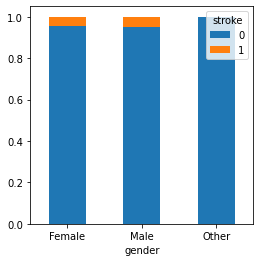

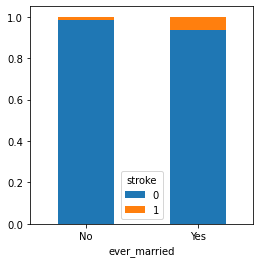

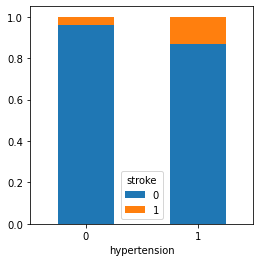

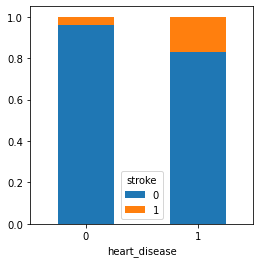

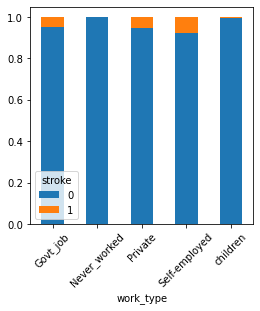

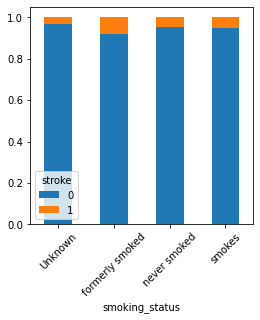

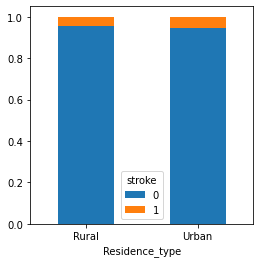

In [5]:
gender = pd.crosstab(data['gender'],data['stroke'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),rot=0)

ever_married = pd.crosstab(data['ever_married'],data['stroke'])
ever_married.div(ever_married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),rot=0)

hypertension = pd.crosstab(data['hypertension'],data['stroke'])
hypertension.div(hypertension.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),rot=0)

heart_disease = pd.crosstab(data['heart_disease'],data['stroke'])
heart_disease.div(heart_disease.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),rot=0)

work_type = pd.crosstab(data['work_type'],data['stroke'])
work_type.div(work_type.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),rot=45)

smoking_status = pd.crosstab(data['smoking_status'],data['stroke'])
smoking_status.div(smoking_status.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),rot=45)

residence_type = pd.crosstab(data['Residence_type'],data['stroke'])
residence_type.div(residence_type.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),rot=0)
plt.show()


**Target Variable with Numerical Variables**

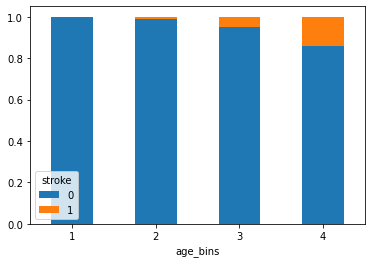

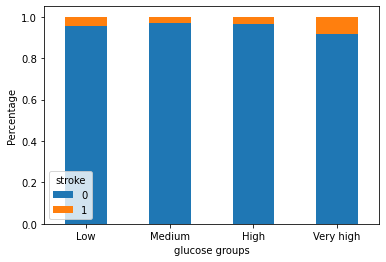

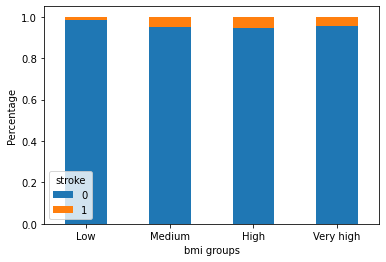

In [6]:
bins = [0,25,45,61,82]
group = [1,2,3,4]
data['age_bins']= pd.cut(data['age'],bins,labels=group)
age = pd.crosstab(data['age_bins'],data['stroke'])
age.div(age.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,rot=0)


bins_2 = [55,77.245000,91.885000,114.090000,271.740000]
group_2 = ['Low','Medium','High','Very high']
data['glucose_bins']= pd.cut(data['avg_glucose_level'],bins_2,labels=group_2)
glucose = pd.crosstab(data['glucose_bins'],data['stroke'])
glucose.div(glucose.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,rot=0)
plt.xlabel('glucose groups')
plt.ylabel('Percentage')


bins_3 = [10,23.5,28.1,33.1,97.6]
group_2 = ['Low','Medium','High','Very high']
data['bmi_bins']= pd.cut(data['bmi'],bins_3,labels=group_2)
bmi = pd.crosstab(data['bmi_bins'],data['stroke'])
bmi.div(bmi.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,rot=0)
plt.xlabel('bmi groups')
plt.ylabel('Percentage')
plt.show()




<AxesSubplot:>

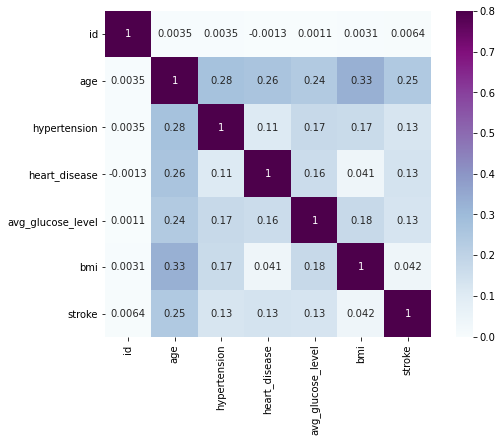

In [7]:
matrix = data.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu',annot=True)

## 2. Data Pre-processing



In [8]:
print(data.isnull().sum()/len(data)*100,'\n')
print(data.gender.value_counts())

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
age_bins             0.000000
glucose_bins         0.000000
bmi_bins             3.933464
dtype: float64 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Because the only column has missing values is **bmi variable** and they only take up **3%** of the total dataset; therefore, they will be deleted from the dataset. In addition to that, since there is only one person identified their **gender** as **'Other'**, which is not significant enough, the row contains this information will also be removed.

A copy of the original data was also created in case it is needed.

In [9]:
data = data.dropna()
data = data.drop(index=3116,axis=0)
data_og = data.copy()

## 3.Models Building

### a. Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV

In [11]:
X = data.drop(columns=['stroke','id'],axis=1)
y = data.stroke

#Create dummies for categorical variables
X = pd.get_dummies(X,drop_first=True)

In the **Understanding the Data section**, it can be seen that this dataset is heavily imbalanced because people who had stroke are proportionally larger than those who have not experienced one. Therefore, if this issue is not resolved, the models will be overfitted and can lead to wrong predictions. As a result, **oversampling** will be introduced in order to balance the dataset. 

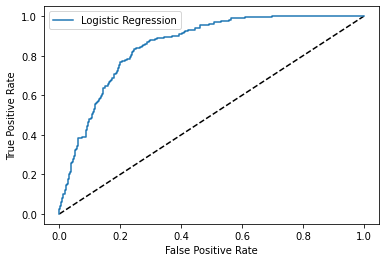

In [18]:
#Oversample the dataset
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

logreg = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,)
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=13,stratify=y)

#Normalize the feature datasets
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

logreg.fit(X_train,y_train)

y_pred_prob = logreg.predict_proba(X_test)[:,1]
y_pred_log = logreg.predict(X_test)

#Ploting ROC curves
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### b. K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

param_grid ={'n_neighbors': np.arange(1,20)}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
k_value = knn_cv.best_params_['n_neighbors']

knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)


## 4. Models Evaluation

### a. Confusion Matrix and Classification Report

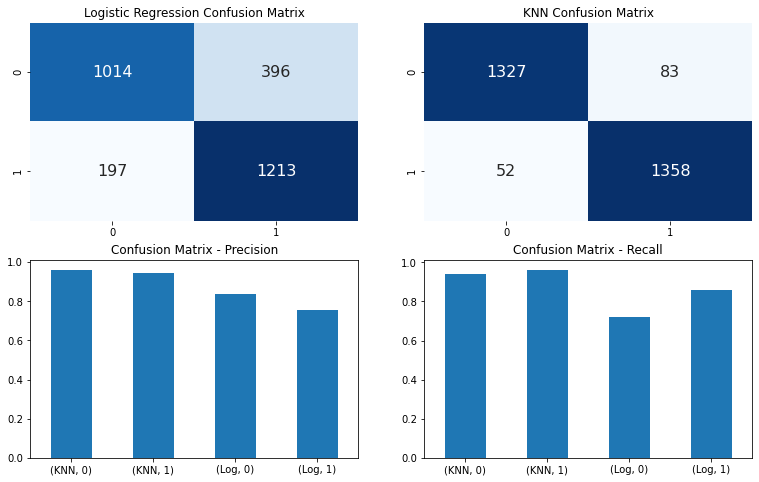

In [20]:
log_report = pd.DataFrame(classification_report(y_test,y_pred_log,output_dict=True)).transpose()
knn_report = pd.DataFrame(classification_report(y_test,y_pred_knn,output_dict=True)).transpose()
knn_matrix = confusion_matrix(y_test,y_pred_knn)
log_matrix = confusion_matrix(y_test,y_pred_log)
classification_report = pd.concat([knn_report[0:2],log_report[0:2]], keys = ['KNN','Log'])

plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(log_matrix,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 16})

plt.subplot(2,3,2)
plt.title("KNN Confusion Matrix")
sns.heatmap(knn_matrix,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 16})

plt.subplot(2,3,4)
plt.title("Confusion Matrix - Precision")
classification_report['precision'].plot.bar(rot=0)

plt.subplot(2,3,5)
plt.title("Confusion Matrix - Recall")
classification_report['recall'].plot.bar(rot=0)
plt.show()

### b. R-squared & Cross-Validation Score

<BarContainer object of 2 artists>

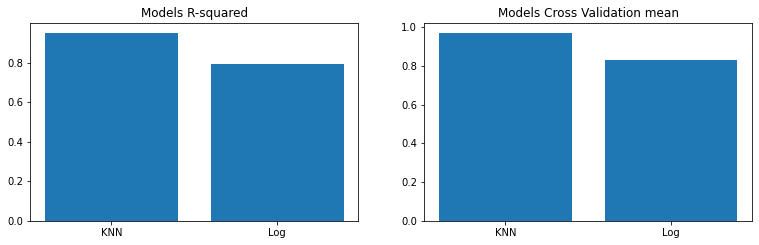

In [21]:
plt.figure(figsize=(20,8))

log_r = logreg.score(X_train,y_train)
knn_r = knn.score(X_test,y_test)

log_cv = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc').mean()
knn_cv = cross_val_score(knn, X_train,y_train,cv=5).mean()

plt.subplot(2,3,1)
plt.title("Models R-squared")
plt.bar([1,2],[knn_r,log_r],tick_label=['KNN', 'Log'])

plt.subplot(2,3,2)
plt.title("Models Cross Validation mean")
plt.bar([1,2],[knn_cv,log_cv],tick_label=['KNN', 'Log'])

## 5. Conclusion

After trying out two different algorithms, K-Nearest Neighbors is the better one with much better R-squared, Cross validation and classification report. However, there are many other aspects to explore in order to create more effective models such as variables' significance testing, variables' interaction effects. 